# 2: INFILTRATION EXCESS & SATURATION EXCESS PROCESSES

# - Infiltration excess

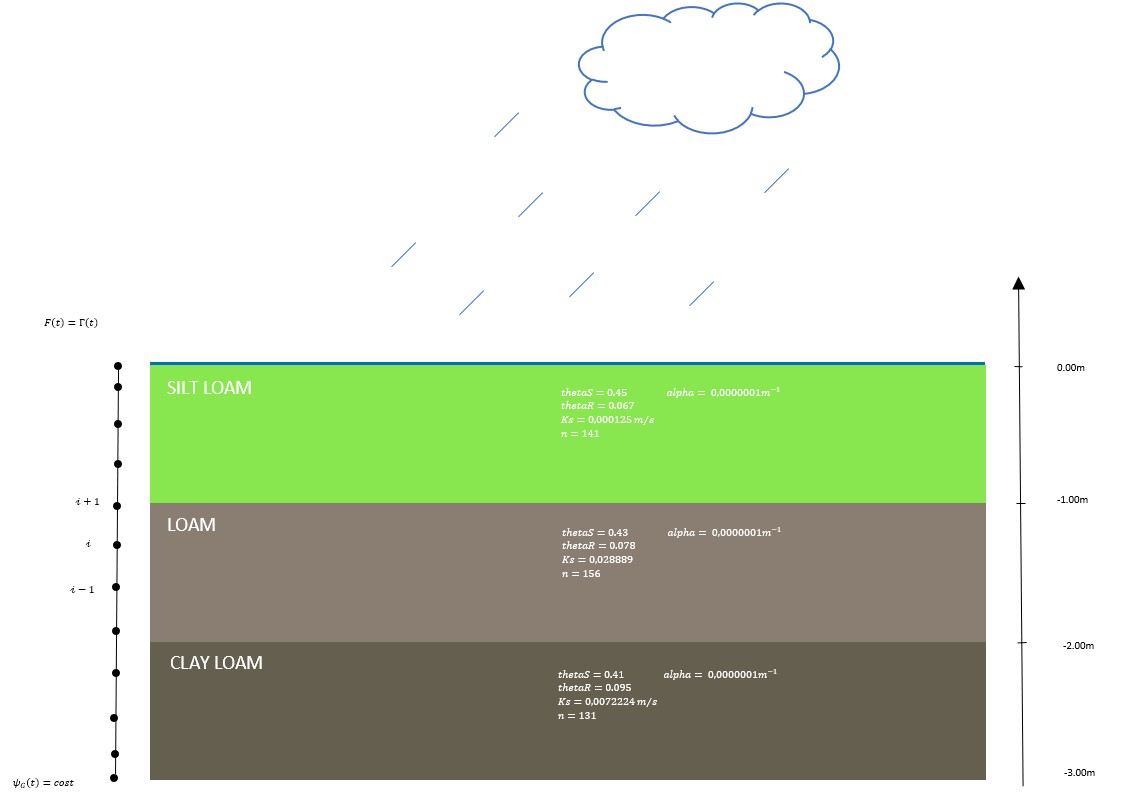

In [25]:
from IPython.display import Image 

Image("Soil_nuovo.jpg")

L'eccesso di infiltrazione o deflusso di Horton si verifica quando l'intensità della pioggia è maggiore della capacità di infiltrazione del suolo:
$$J > \big|-K(\psi)\dfrac{\partial \psi}{\partial z} - K(\psi)\big|\Big|_{\eta=0} $$
L'eccesso di infiltrazione è più comunemente osservato con precipitazioni intense e di breve durata. La condizione al contorno è dipendente dal sistema, dunque stabilirla può non essere semplice: il tasso di infiltrazione attraverso la superficie del suolo dipende dalle precipitazioni, dall'intensità delle precipitazioni $J$ e dalle condizioni di umidità del suolo. Per questo motivo, la condizione al contorno della superficie può cambiare dal tipo Dirichlet - aspirazione dell'acqua prescritta - al tipo Neumann - flusso prescritto - e viceversa. 

Condizioni che favoriscono l'infiltrazione: tessitura del suolo a bassa conduttività come argilla o limo, suoli urbani compattati, suoli artificiali, crusting, elevata intensità delle precipitazioni, idrofobicità del suolo, bassa temperatura (influisce sulla viscosità), hydraulic head, nessuna copertura vegetale (attenua le precipitazioni e favorisce le infiltrazioni).

## Definizione del profilo stratigrafico

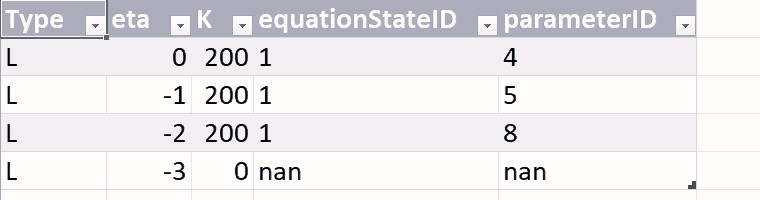

In [26]:
Image("grid2.jpg")

## Definizione condizioni iniziali

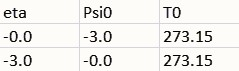

In [27]:
Image("18.jpg")

## creazione file .nc e salvataggio 

In [14]:
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset
from IPython.display import Image

In [15]:
folderPath = "C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3"
grid_input_file_name = folderPath + "/GRID_2.csv"
ic_input_file_name = folderPath + "/GRID_2_IC.csv"
parameter_input_file_name = folderPath + "/Richards_VG.csv"
dictionary_input_file_name = folderPath + "/dictionary.csv"

output_file_name = "C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3/pistachio2.nc"
output_title = 'Computational grid for 2:infiltration excess wet initial condition.'
output_summary =''
output_date = ''
output_institution = 'Geoframe'

grid_type = 'classical'
dz_min = -9999 # not required for grid_type = 'classical'
dz_max = -9999 # not required for grid_type = 'classical'
b = -9999      # not required for grid_type = 'classical'
psi_interp_model = "linear"
T_interp_model = "linear"
water_ponding_0 = -3.0
T_water_ponding_0 = 273.15

In [16]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3/pistachio2.nc


## modifica file.sim

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

In [18]:
rain = io_csv.pandas_read_OMS_timeseries('Precout.csv',datetime_index=False)
rain.head()

,Datetime,0
0,2022-07-05 00:00:00,0.0
1,2022-07-05 00:05:00,0.0
2,2022-07-05 00:10:00,0.0
3,2022-07-05 00:15:00,0.0
4,2022-07-05 00:20:00,0.0


In [19]:
ds = xr.open_dataset(folderPath + '\pistachio2_output_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 600, dualDepth: 600, time: 577)
Coordinates:
  * depth             (depth) float64 -2.998 -2.993 -2.988 ... -0.0075 -0.0025
  * dualDepth         (dualDepth) float64 -3.0 -2.995 -2.99 ... -0.01 -0.005
  * time              (time) datetime64[ns] 2022-07-05 ... 2022-07-07
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:/Users/omen/Desktop/ESERCITAZIONE_3...
    path_bottom_boundary_condition:     C:/Users/omen/Desktop/ESERCITAZIONE_3...
    path_grid:                          C:/Users/omen/Desktop/ESERCITAZIONE_3...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

## plot dei grafici

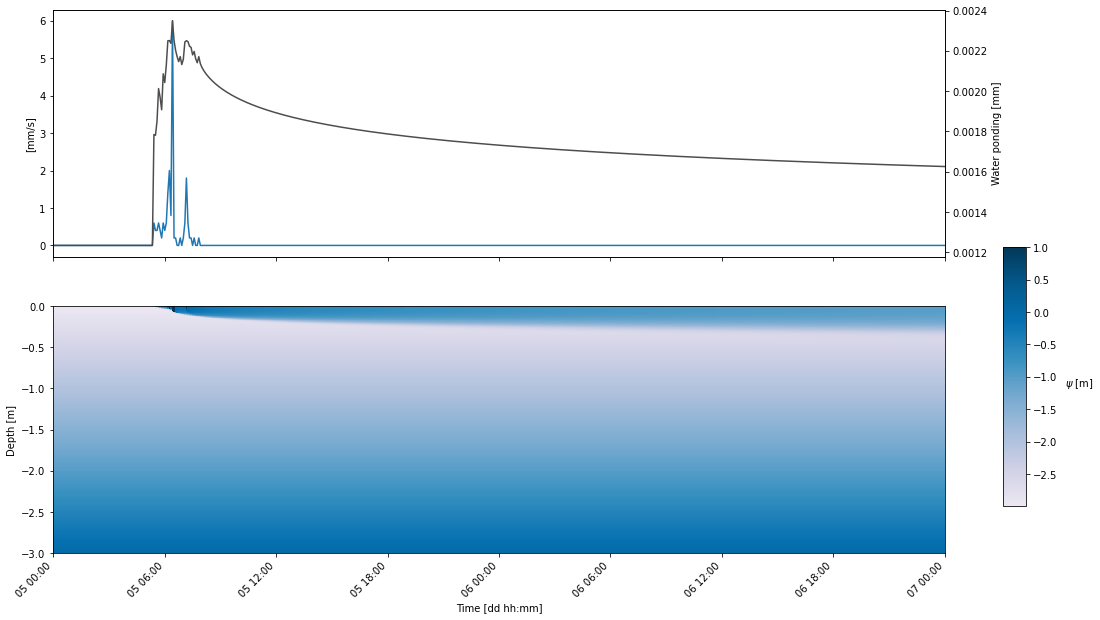

In [20]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(16, 10)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=1.0)

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.show()

Il grafico mostra in alto la precipitazione e l'evoluzione del ponding in superficie nel tempo, mentre in basso mostra l'evoluzione della suzione nel terreno. Si nota come il ponding si forma con il picco di precipitazione, e minimuisce man mano che l'acqua infiltra nel terreno.

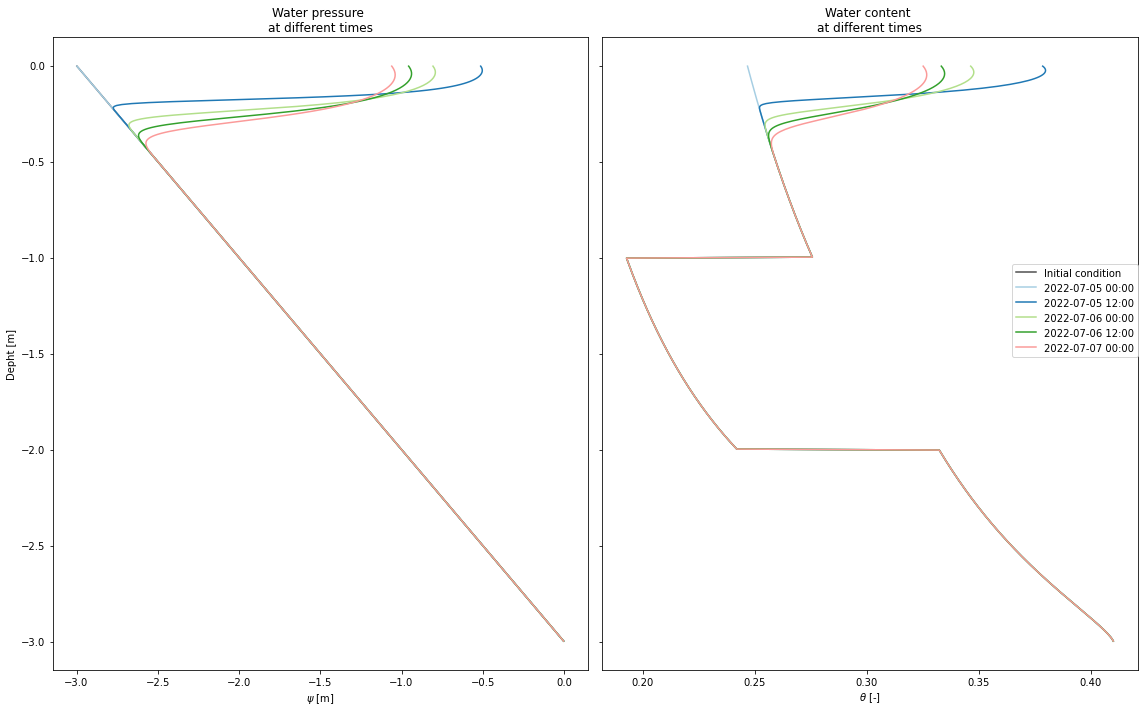

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(16, 10)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2022-07-05 00:00').plot(ax=ax1, y='depth', label='2022-07-05 00:00', color=colors[0])
ds.psi.sel(time='2022-07-05 12:00').plot(ax=ax1, y='depth', label='2022-07-05 12:00', color=colors[1])
ds.psi.sel(time='2022-07-06 00:00').plot(ax=ax1, y='depth', label='2022-07-06 00:00', color=colors[2])
ds.psi.sel(time='2022-07-06 12:00').plot(ax=ax1, y='depth', label='2022-07-06 12:00', color=colors[3])
ds.psi.sel(time='2022-07-07 00:00').plot(ax=ax1, y='depth', label='2022-07-07 00:00', color=colors[4])
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2022-07-05 00:00').plot(ax=ax2, y='depth', label='2022-07-05 00:00', color=colors[0])
ds.theta.sel(time='2022-07-05 12:00').plot(ax=ax2, y='depth', label='2022-07-05 12:00', color=colors[1])
ds.theta.sel(time='2022-07-06 00:00').plot(ax=ax2, y='depth', label='2022-07-06 00:00', color=colors[2])
ds.theta.sel(time='2022-07-06 12:00').plot(ax=ax2, y='depth', label='2022-07-06 12:00', color=colors[3])
ds.theta.sel(time='2022-07-07 00:00').plot(ax=ax2, y='depth', label='2022-07-07 00:00', color=colors[4])
# ds.theta.sel(time='2020-01-02 00:00').plot(ax=ax2, y='depth', label='2020-01-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

La suzione inizialmente segue il profilo idrostatico, ma durante la precipitazione aumenta nella parte più superficiale del terreno, come il contenuto d'acqua. Nel grafico del contenuto d'acqua si distinguono chiaramente i tre strati di terreno.

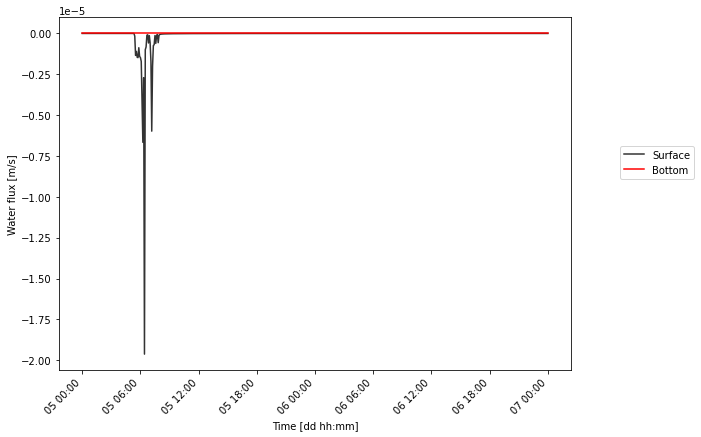

In [12]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

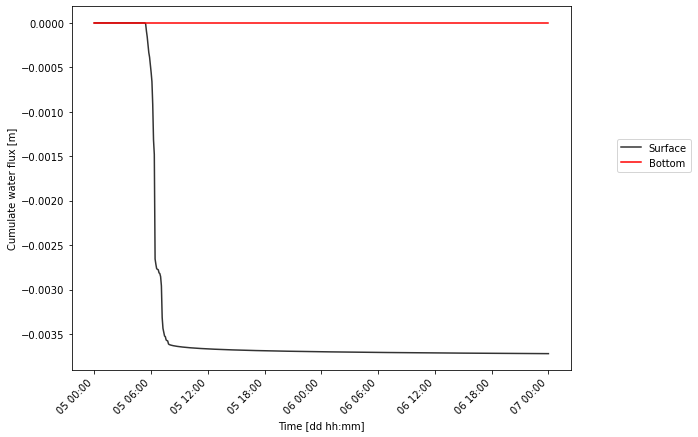

In [13]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

# -Saturation excess

L'eccesso di saturazione o deflusso Dunniano si verifica quando la quantità totale di precipitazioni è maggiore della capacità massima di ritenzione idrica ma l'intensità delle precipitazioni è inferiore al tasso di infiltrazione massimo.

Si presume che la condizione iniziale sia idrostatica con 𝜓=−2 [m] in basso.
La condizione al contorno della superficie è una pioggia sintetica; al fondo specifichiamo una condizione al contorno di Dirichlet con costante 𝜓=−2 [m]

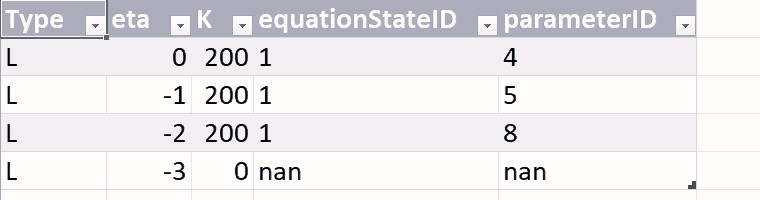

In [28]:
Image("grid2.jpg")

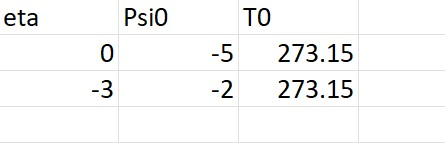

In [29]:
Image("grid3IC.jpg")

In [14]:
from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from netCDF4 import Dataset
from IPython.display import Image

In [30]:
folderPath = "C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3"
grid_input_file_name = folderPath + "/GRID_2.csv"
ic_input_file_name = folderPath + "/GRID_3_IC.csv"
parameter_input_file_name = folderPath + "/Richards_VG.csv"
dictionary_input_file_name = folderPath + "/dictionary.csv"

output_file_name = "C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3/pistachio3.nc"
output_title = 'Computational grid for 3:saturation excess wet initial condition.'
output_summary =''
output_date = ''
output_institution = 'Geoframe'

grid_type = 'classical'
dz_min = -9999 # not required for grid_type = 'classical'
dz_max = -9999 # not required for grid_type = 'classical'
b = -9999      # not required for grid_type = 'classical'
psi_interp_model = "linear"
T_interp_model = "linear"
water_ponding_0 = -3.0
T_water_ponding_0 = 273.15

In [32]:
data_grid = pd.read_csv(grid_input_file_name)

data_ic = pd.read_csv(ic_input_file_name)

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)



***SUCCESS writing!  C:/Users/E580/Desktop/UNI/Idrologia/Esercitazione3/pistachio3.nc


## Modifica file.sim

In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
from geoframepy.timeseries import io_csv
%matplotlib inline
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

In [34]:
rain = io_csv.pandas_read_OMS_timeseries('Precout.csv',datetime_index=False)
rain.head()

,Datetime,0
0,2022-07-05 00:00:00,0.0
1,2022-07-05 00:05:00,0.0
2,2022-07-05 00:10:00,0.0
3,2022-07-05 00:15:00,0.0
4,2022-07-05 00:20:00,0.0


In [35]:
ds = xr.open_dataset(folderPath + '\pistachio3_output_0000.nc')
ds

<xarray.Dataset>
Dimensions:           (depth: 600, dualDepth: 600, time: 577)
Coordinates:
  * depth             (depth) float64 -2.998 -2.993 -2.988 ... -0.0075 -0.0025
  * dualDepth         (dualDepth) float64 -3.0 -2.995 -2.99 ... -0.01 -0.005
  * time              (time) datetime64[ns] 2022-07-05 ... 2022-07-07
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex04.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Dirichlet
    path_top_boundary_condition:        C:/Users/E580/Desktop/UNI/Idrologia/E...
    path_bottom_boundary_condition:     C:/Users/E580/Desktop/UNI/Idrologia/E...
    path_grid:                          C:/Users/E580/Desktop/UNI/Idrologia/E...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

## Plot grafici

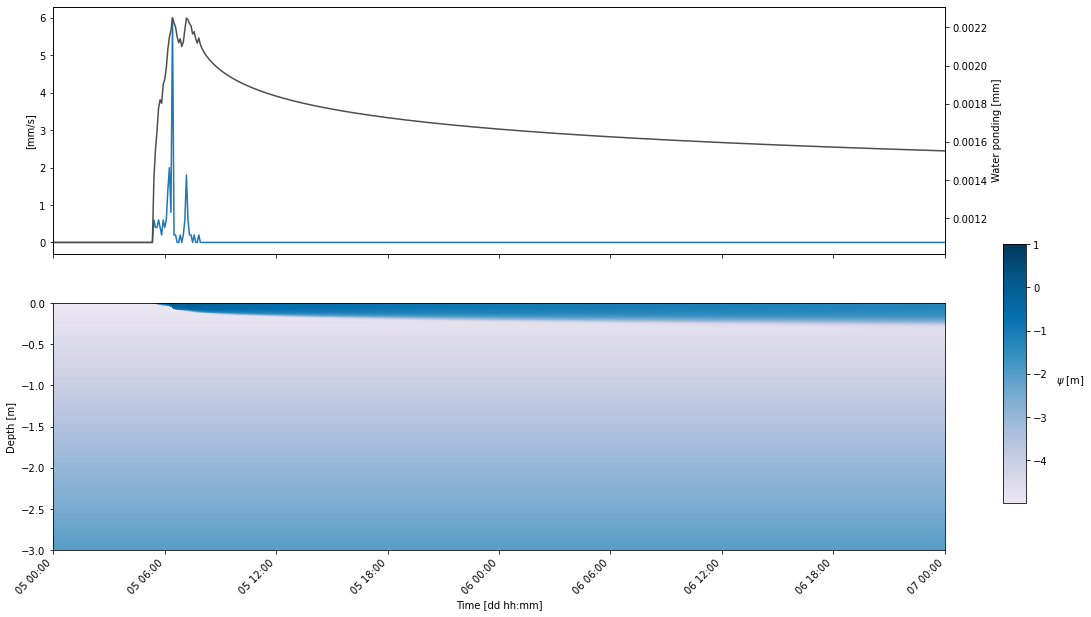

In [36]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(16, 10)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=1.0)#np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('[mm/s]')

ax1=ax[0].twinx()
ds.waterVolume.sel(depth=0.0, method='nearest').plot(ax=ax1,color='0.3')
ax1.set_ylabel('Water ponding [mm]')
ax1.set_title(None)


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh:mm]')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.95, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.show()

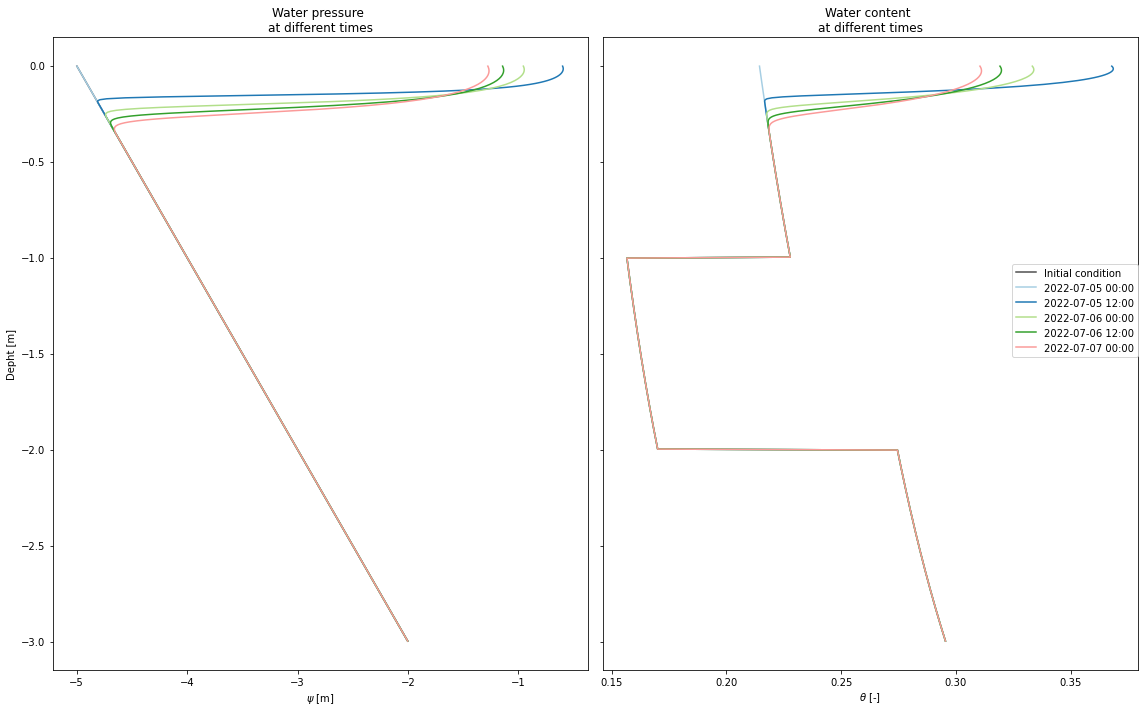

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(16, 10)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2022-07-05 00:00').plot(ax=ax1, y='depth', label='2022-07-05 00:00', color=colors[0])
ds.psi.sel(time='2022-07-05 12:00').plot(ax=ax1, y='depth', label='2022-07-05 12:00', color=colors[1])
ds.psi.sel(time='2022-07-06 00:00').plot(ax=ax1, y='depth', label='2022-07-06 00:00', color=colors[2])
ds.psi.sel(time='2022-07-06 12:00').plot(ax=ax1, y='depth', label='2022-07-06 12:00', color=colors[3])
ds.psi.sel(time='2022-07-07 00:00').plot(ax=ax1, y='depth', label='2022-07-07 00:00', color=colors[4])
# ds.psi.sel(time='2020-01-02 00:00').plot(ax=ax1, y='depth', label='2020-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2022-07-05 00:00').plot(ax=ax2, y='depth', label='2022-07-05 00:00', color=colors[0])
ds.theta.sel(time='2022-07-05 12:00').plot(ax=ax2, y='depth', label='2022-07-05 12:00', color=colors[1])
ds.theta.sel(time='2022-07-06 00:00').plot(ax=ax2, y='depth', label='2022-07-06 00:00', color=colors[2])
ds.theta.sel(time='2022-07-06 12:00').plot(ax=ax2, y='depth', label='2022-07-06 12:00', color=colors[3])
ds.theta.sel(time='2022-07-07 00:00').plot(ax=ax2, y='depth', label='2022-07-07 00:00', color=colors[4])
# ds.theta.sel(time='2020-01-02 00:00').plot(ax=ax2, y='depth', label='2020-01-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

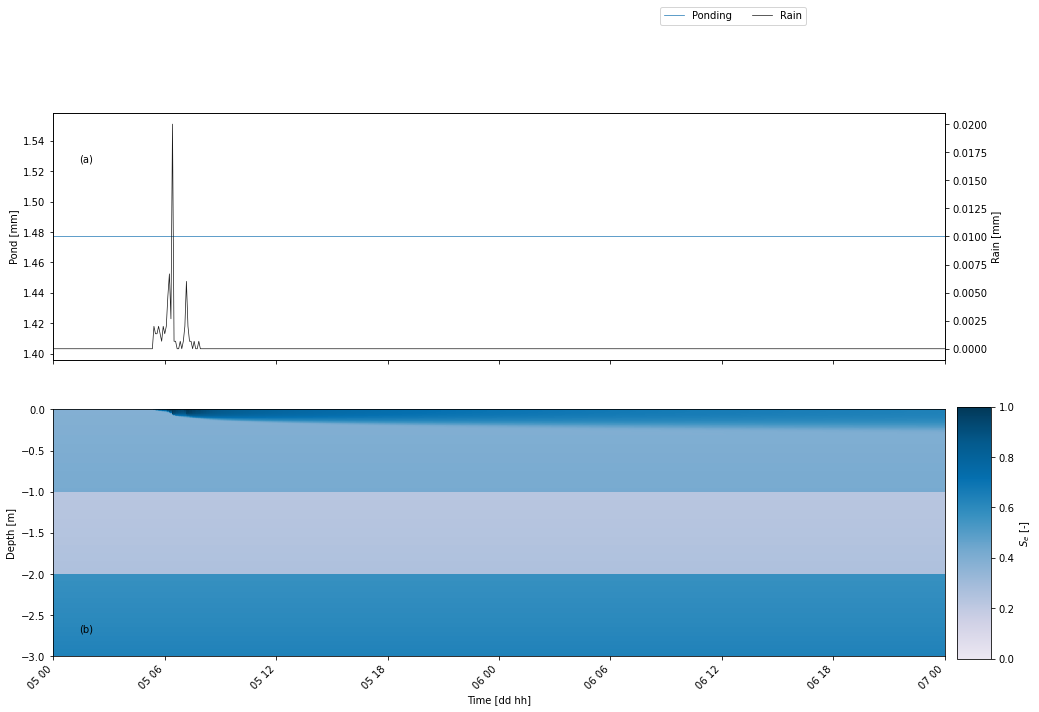

In [39]:
line_w = 0.7

start_date = '2022-07-05 00:00'
end_date = '2022-07-07 00:00'

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(16, 10))

lns1 = ax[0].plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.waterVolume.sel(depth=-2.9975e+00).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds.time.sel(time=slice(start_date, end_date)).values, ds.topBC.sel(time=slice(start_date,end_date))/300, label='Rain', linewidth=line_w, color='0.1')

ax0twin.set_ylabel('Rain [mm]')
ax[0].set_ylabel('Pond [mm]')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.85,1.45) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
im = ds.saturationDegree.where(ds.depth<0.0).sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [dd hh]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$S_e$ [-]')

#ax[0].axvline(x=ds.time.sel(time='2022-07-05 10:35').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
#ax[0].axvline(x=ds.time.sel(time='2022-07-05 17:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=10,
             transform=ax[0].transAxes)
plt.text( 0.03,0.1, '(b)', fontsize=10,
             transform=ax[1].transAxes)


plt.show()